
image 1/159 C:\Users\Huijb\OneDrive\Bureaublad\Fontys\Semester 4\Group project\YOLOv8\data\images\IMG_20240927_102118.jpg: 480x640 (no detections), 31.0ms
image 2/159 C:\Users\Huijb\OneDrive\Bureaublad\Fontys\Semester 4\Group project\YOLOv8\data\images\IMG_20240927_102343.jpg: 640x480 (no detections), 31.0ms
image 3/159 C:\Users\Huijb\OneDrive\Bureaublad\Fontys\Semester 4\Group project\YOLOv8\data\images\IMG_20240927_102345.jpg: 640x480 (no detections), 24.6ms
image 4/159 C:\Users\Huijb\OneDrive\Bureaublad\Fontys\Semester 4\Group project\YOLOv8\data\images\IMG_20240927_102459.jpg: 480x640 (no detections), 28.0ms
image 5/159 C:\Users\Huijb\OneDrive\Bureaublad\Fontys\Semester 4\Group project\YOLOv8\data\images\IMG_20240927_102501.jpg: 480x640 (no detections), 24.5ms
image 6/159 C:\Users\Huijb\OneDrive\Bureaublad\Fontys\Semester 4\Group project\YOLOv8\data\images\IMG_20240927_102755.jpg: 480x640 (no detections), 24.0ms
image 7/159 C:\Users\Huijb\OneDrive\Bureaublad\Fontys\Semester 4\Grou

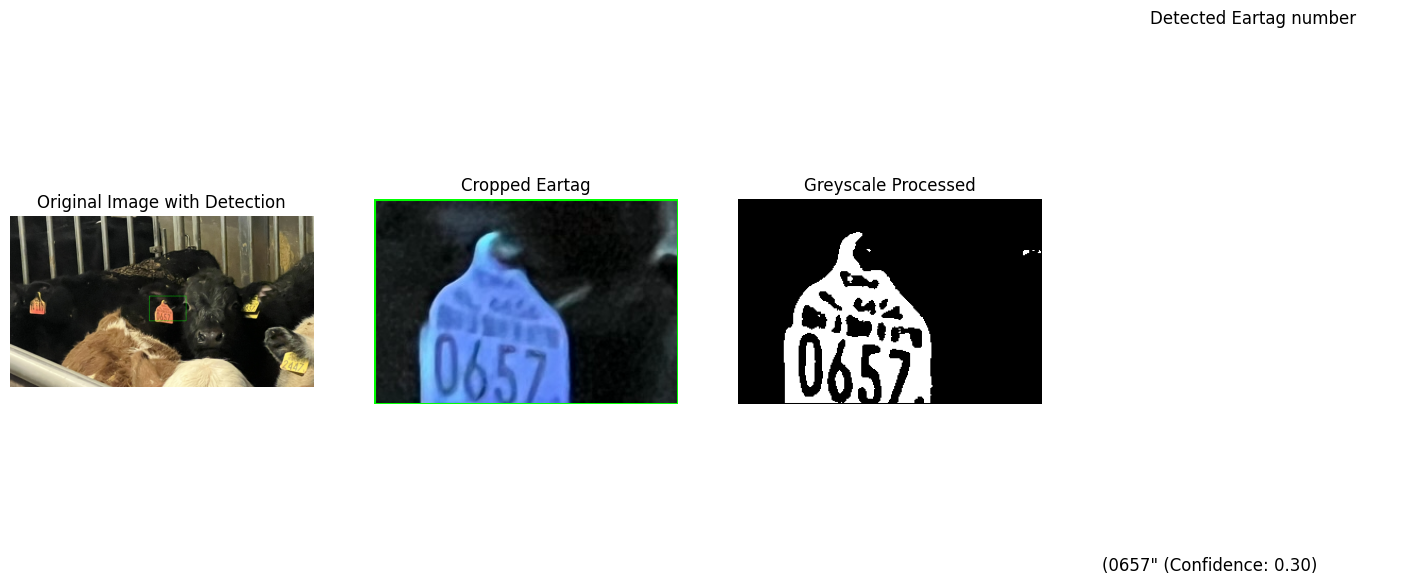

In [7]:

from ultralytics import YOLO
import cv2
import os
import matplotlib.pyplot as plt
import easyocr

model = YOLO(r"C:/Users/Huijb/OneDrive/Bureaublad/Fontys/Semester 4/Group project/YOLOv8/runs/detect/train3/weights/last.pt")  # build a new model from scratch
#model = YOLO("yolov8n.yaml")  # build a new model from scratch
reader = easyocr.Reader(['en']) 

output_dir = "detections_with_labels"
os.makedirs(output_dir, exist_ok=True)

#model.train(data="config.yaml", epochs=5, batch=4, resume=True, half=True)

test_image_path = r"C:\Users\Huijb\OneDrive\Bureaublad\Fontys\Semester 4\Group project\YOLOv8\data\images"  # Replace with the path to a specific image from your dataset

results = model.predict(source=test_image_path, save=False)

for i, result in enumerate(results):
    if len(result.boxes) == 0:
        continue

    original_image = result.orig_img

    for j, box in enumerate(result.boxes):
        x1, y1, x2, y2 = map(int, box.xyxy[0]) 

        cv2.rectangle(original_image, (x1, y1), (x2, y2), (0, 255, 0), 2) 
        cropped_eartag = original_image[y1:y2, x1:x2]  
        ocr_results = reader.readtext(cropped_eartag)
   
        detected_text = []
        for (bbox, text, prob) in ocr_results:
            detected_text.append((text, prob))
            print(f"Detected text: {text} (Confidence: {prob})")

        # Step 1: Convert to grayscale
        gray = cv2.cvtColor(cropped_eartag, cv2.COLOR_BGR2GRAY)

        _, thresh_binary = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)
        thresh_adaptive = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

        plt.figure(figsize=(18, 7))

        # Original image
        plt.subplot(1, 4, 1)
        plt.title("Original Image")
        plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
        plt.axis('off')

        # Cropped image
        plt.subplot(1, 4, 2)
        plt.title("Cropped")
        plt.imshow(cropped_eartag)
        plt.axis('off')

        # Processed image
        plt.subplot(1, 4, 3)
        plt.title("Greyscale Processed")
        plt.imshow(thresh_binary, cmap="gray")
        plt.axis('off')

        # Eartag Number
        plt.subplot(1, 4, 4)
        plt.title("Detected Eartag number")
        plt.axis('off')
        plt.text(0, 0, "\n".join([f"{text} (Confidence: {prob:.2f})" for text, prob in detected_text]), fontsize=12)

        plt.show()